In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [57]:
df = pd.read_excel("/content/ML Live Flight Fare Resourses16963295320.xlsx")

In [58]:
df.shape

(10683, 11)

In [59]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [63]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [64]:
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [65]:
df.drop("Date_of_Journey",inplace=True,axis=1)


In [66]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [67]:
df.drop("Additional_Info",axis=1,inplace=True)

In [68]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1


In [69]:
df.drop("Route",axis=1,inplace=True)

In [71]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1


In [72]:
df["Dep_Hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df["Dep_Min"] = pd.to_datetime(df['Dep_Time']).dt.minute

In [73]:
df.drop("Dep_Time",axis=1,inplace=True)

In [74]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,5,1,5,50


In [75]:
df["Arr_Hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arr_Min"] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop("Arrival_Time",axis=1,inplace=True)

In [76]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35


In [81]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
          ... 
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [85]:
df["Duration"].str.split().str[0].str.split("h").str[0]  #To Substact hours in numbers from the Duration Column

0        2
1        7
        ..
10681    2
10682    8
Name: Duration, Length: 10683, dtype: object

In [86]:
df["Duration"].str.split().str[1].str.split("m").str[0]       #To Substact Minute in numbers from the Duration Column

0        50
1        25
         ..
10681    40
10682    20
Name: Duration, Length: 10683, dtype: object

In [89]:
Duration = list(df["Duration"])

In [90]:
for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in Duration[i]:
            Duration[i] = Duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            Duration[i] = "0h " + Duration[i]           # Adds 0 hour

In [91]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8,Jet Airways,Banglore,New Delhi,25h 30m,1 stop,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,7h 50m,1 stop,8625,5,27,11,25,19,15


In [93]:
Duration_hours = []
Duration_mins = []
for i in range(len(Duration)):
    Duration_hours.append(int(Duration[i].split(sep = "h")[0]))    # Extract hours from duration
    Duration_mins.append(int(Duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [98]:
df["Duration_mins"] = Duration_mins

In [99]:
df["Duration_hours"] = Duration_hours

In [102]:
df.drop("Duration",axis=1,inplace=True)

In [103]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [107]:
df["Airline"].value_counts()

Jet Airways                3849
IndiGo                     2053
                           ... 
Vistara Premium economy       3
Trujet                        1
Name: Airline, Length: 12, dtype: int64

<Axes: xlabel='Airline'>

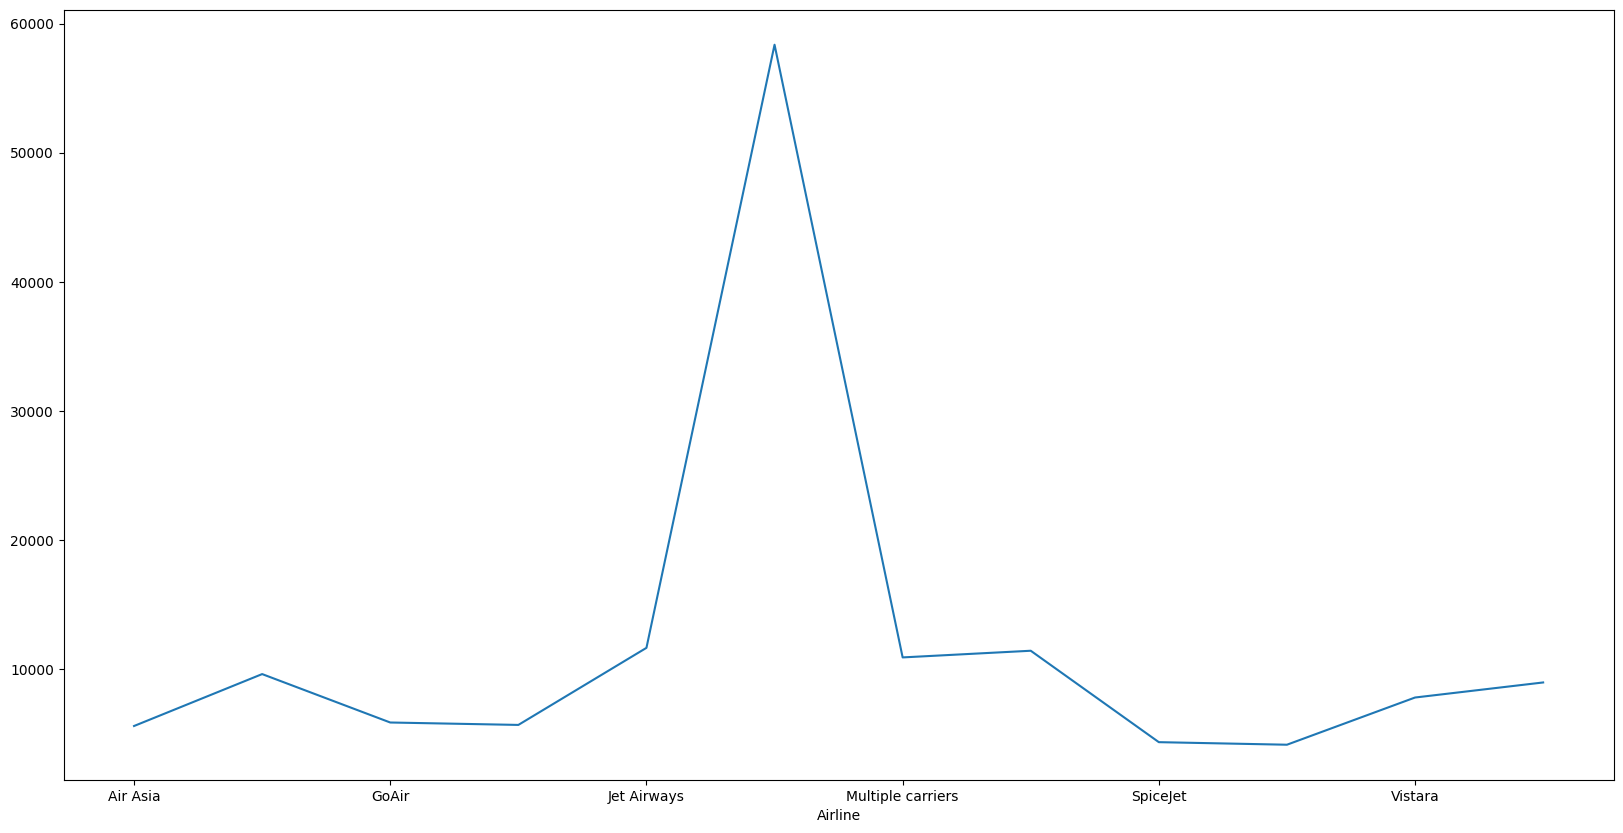

In [108]:
df.groupby('Airline')['Price'].mean().plot(figsize=(20,10))

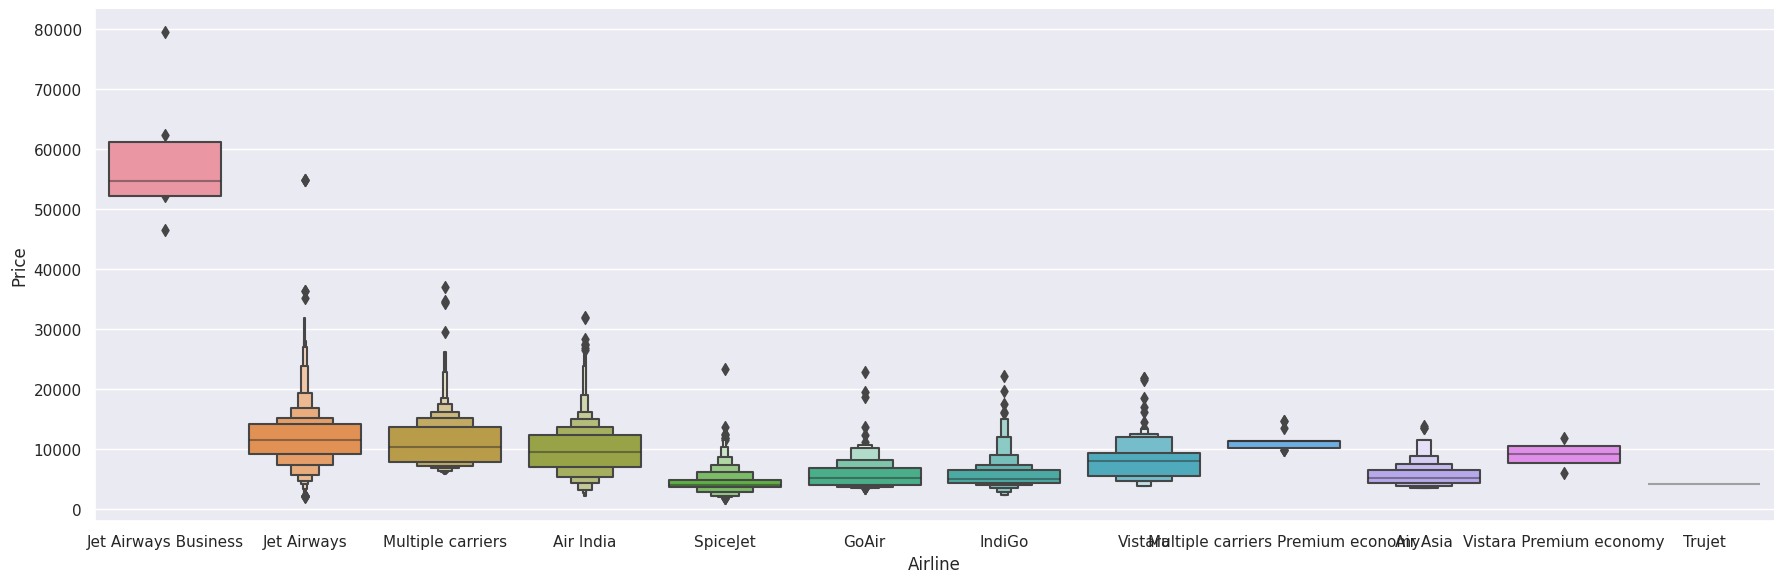

In [112]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [113]:
df["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Axes: xlabel='Source'>

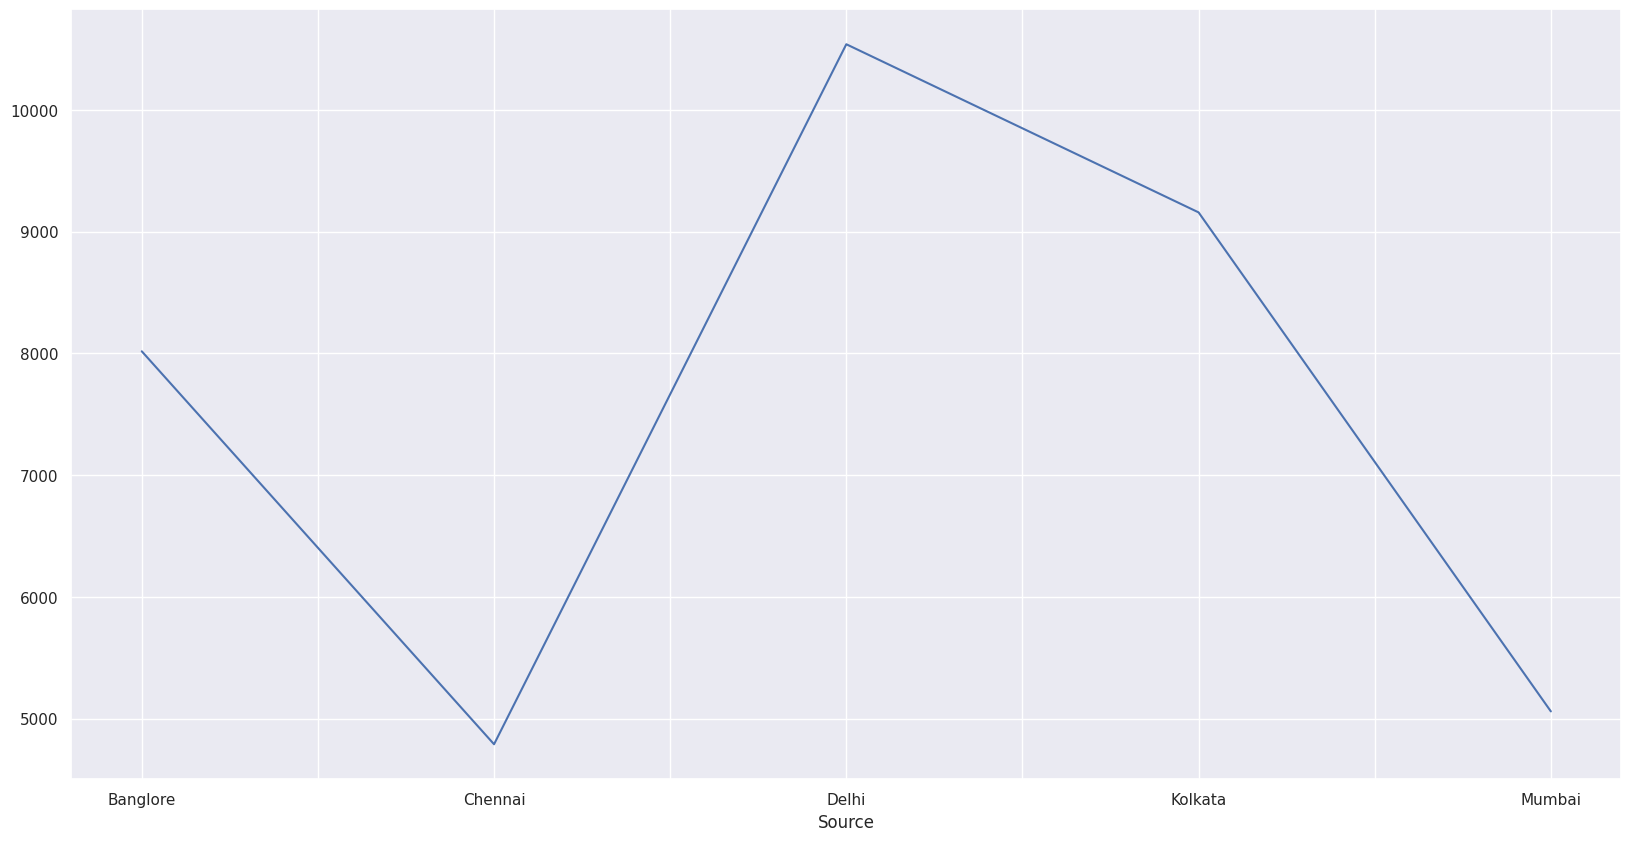

In [114]:
df.groupby('Source')['Price'].mean().plot(figsize=(20,10))

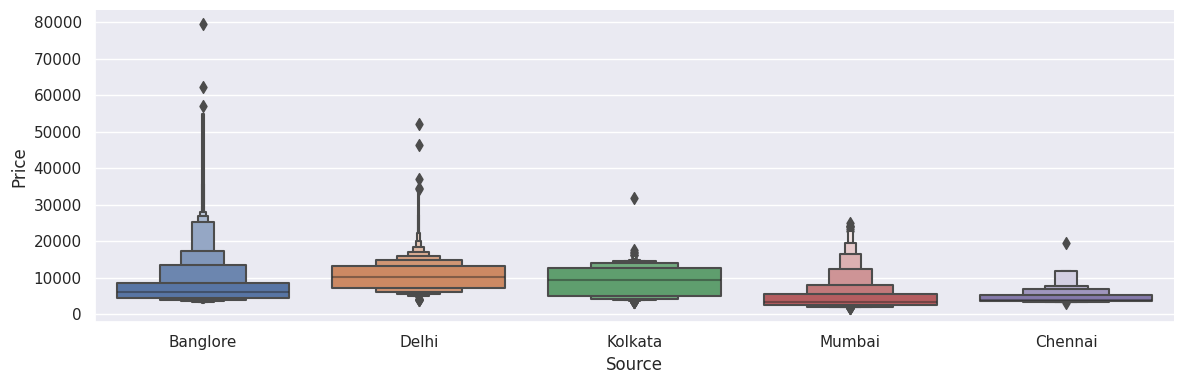

In [115]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [116]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


<Axes: xlabel='Total_Stops'>

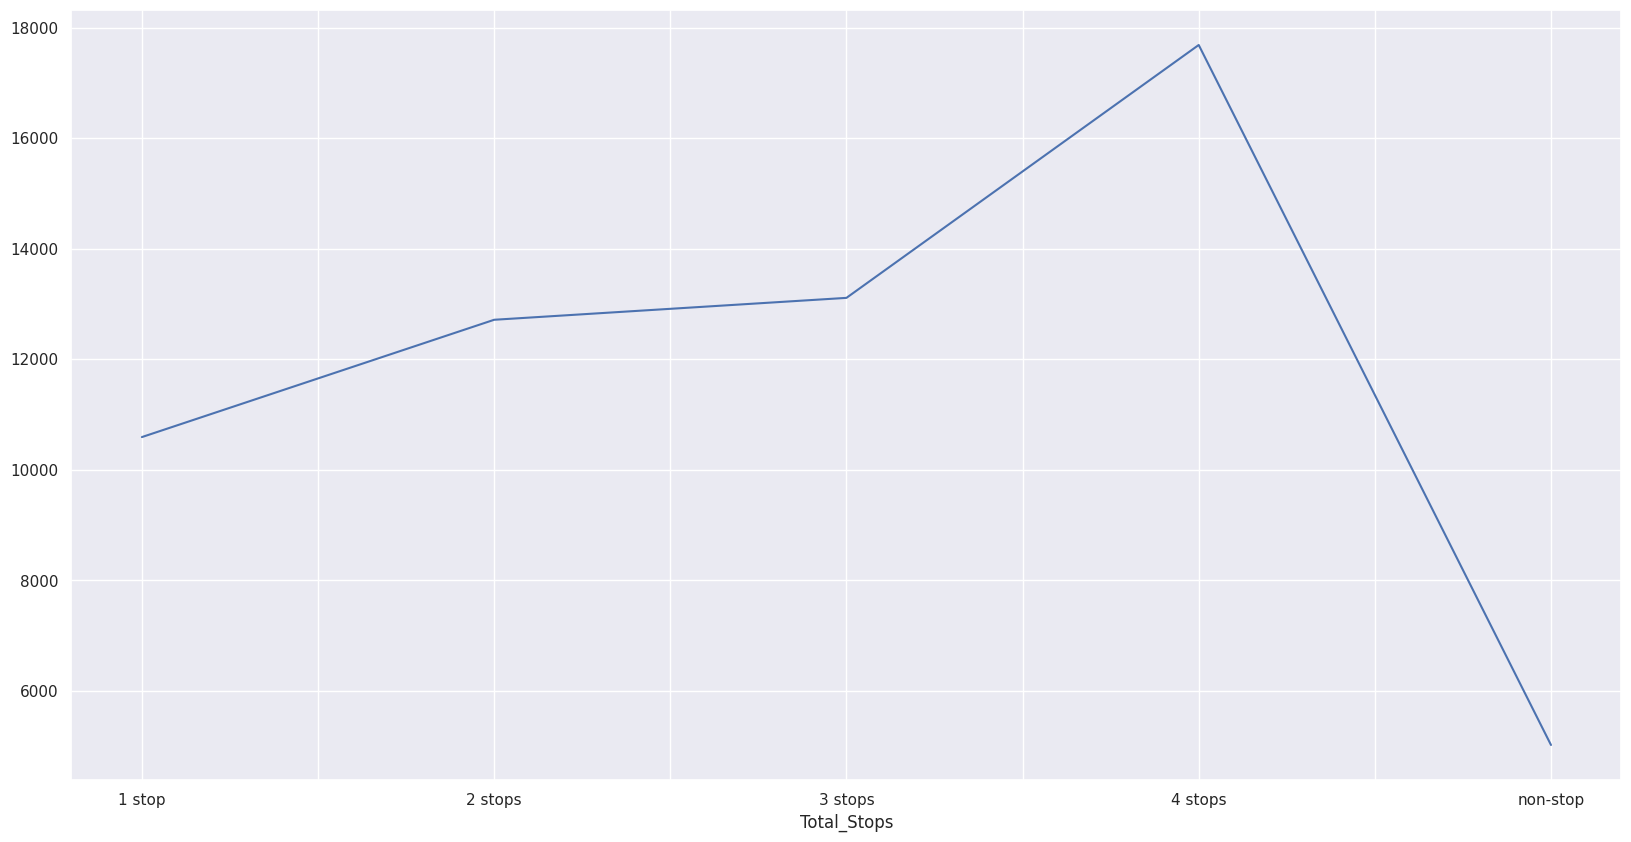

In [118]:
df.groupby('Total_Stops')['Price'].mean().plot(figsize=(20,10))

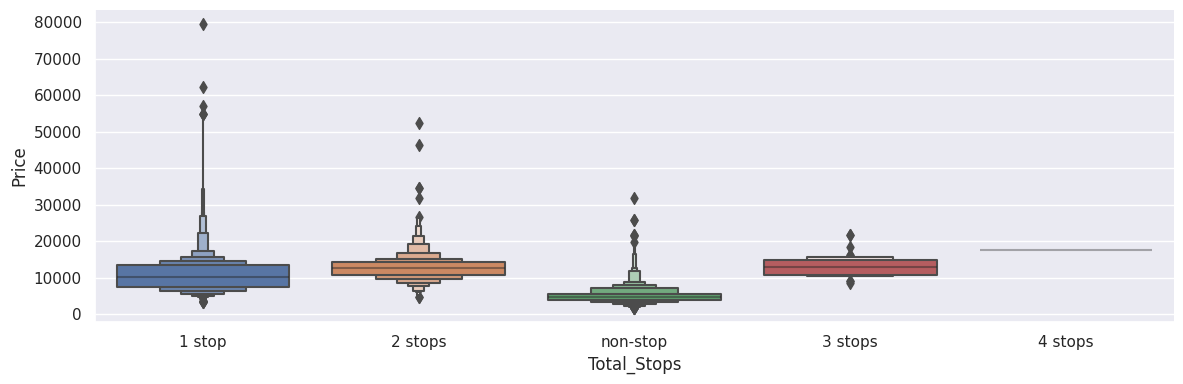

In [119]:
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [120]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [121]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,16,50,21,35,4,45


In [123]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [125]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [126]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [127]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10681,Vistara,Banglore,New Delhi,0.0,12648,3,1,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10682,Air India,Delhi,Cochin,2.0,11753,5,9,10,55,19,15,8,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [132]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

KeyError: "['Airline', 'Source', 'Destination'] not found in axis"

In [133]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [140]:
df.dropna(inplace=True)
x=df.drop("Price",axis=1)
y=df["Price"]

In [141]:
x.head()

,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


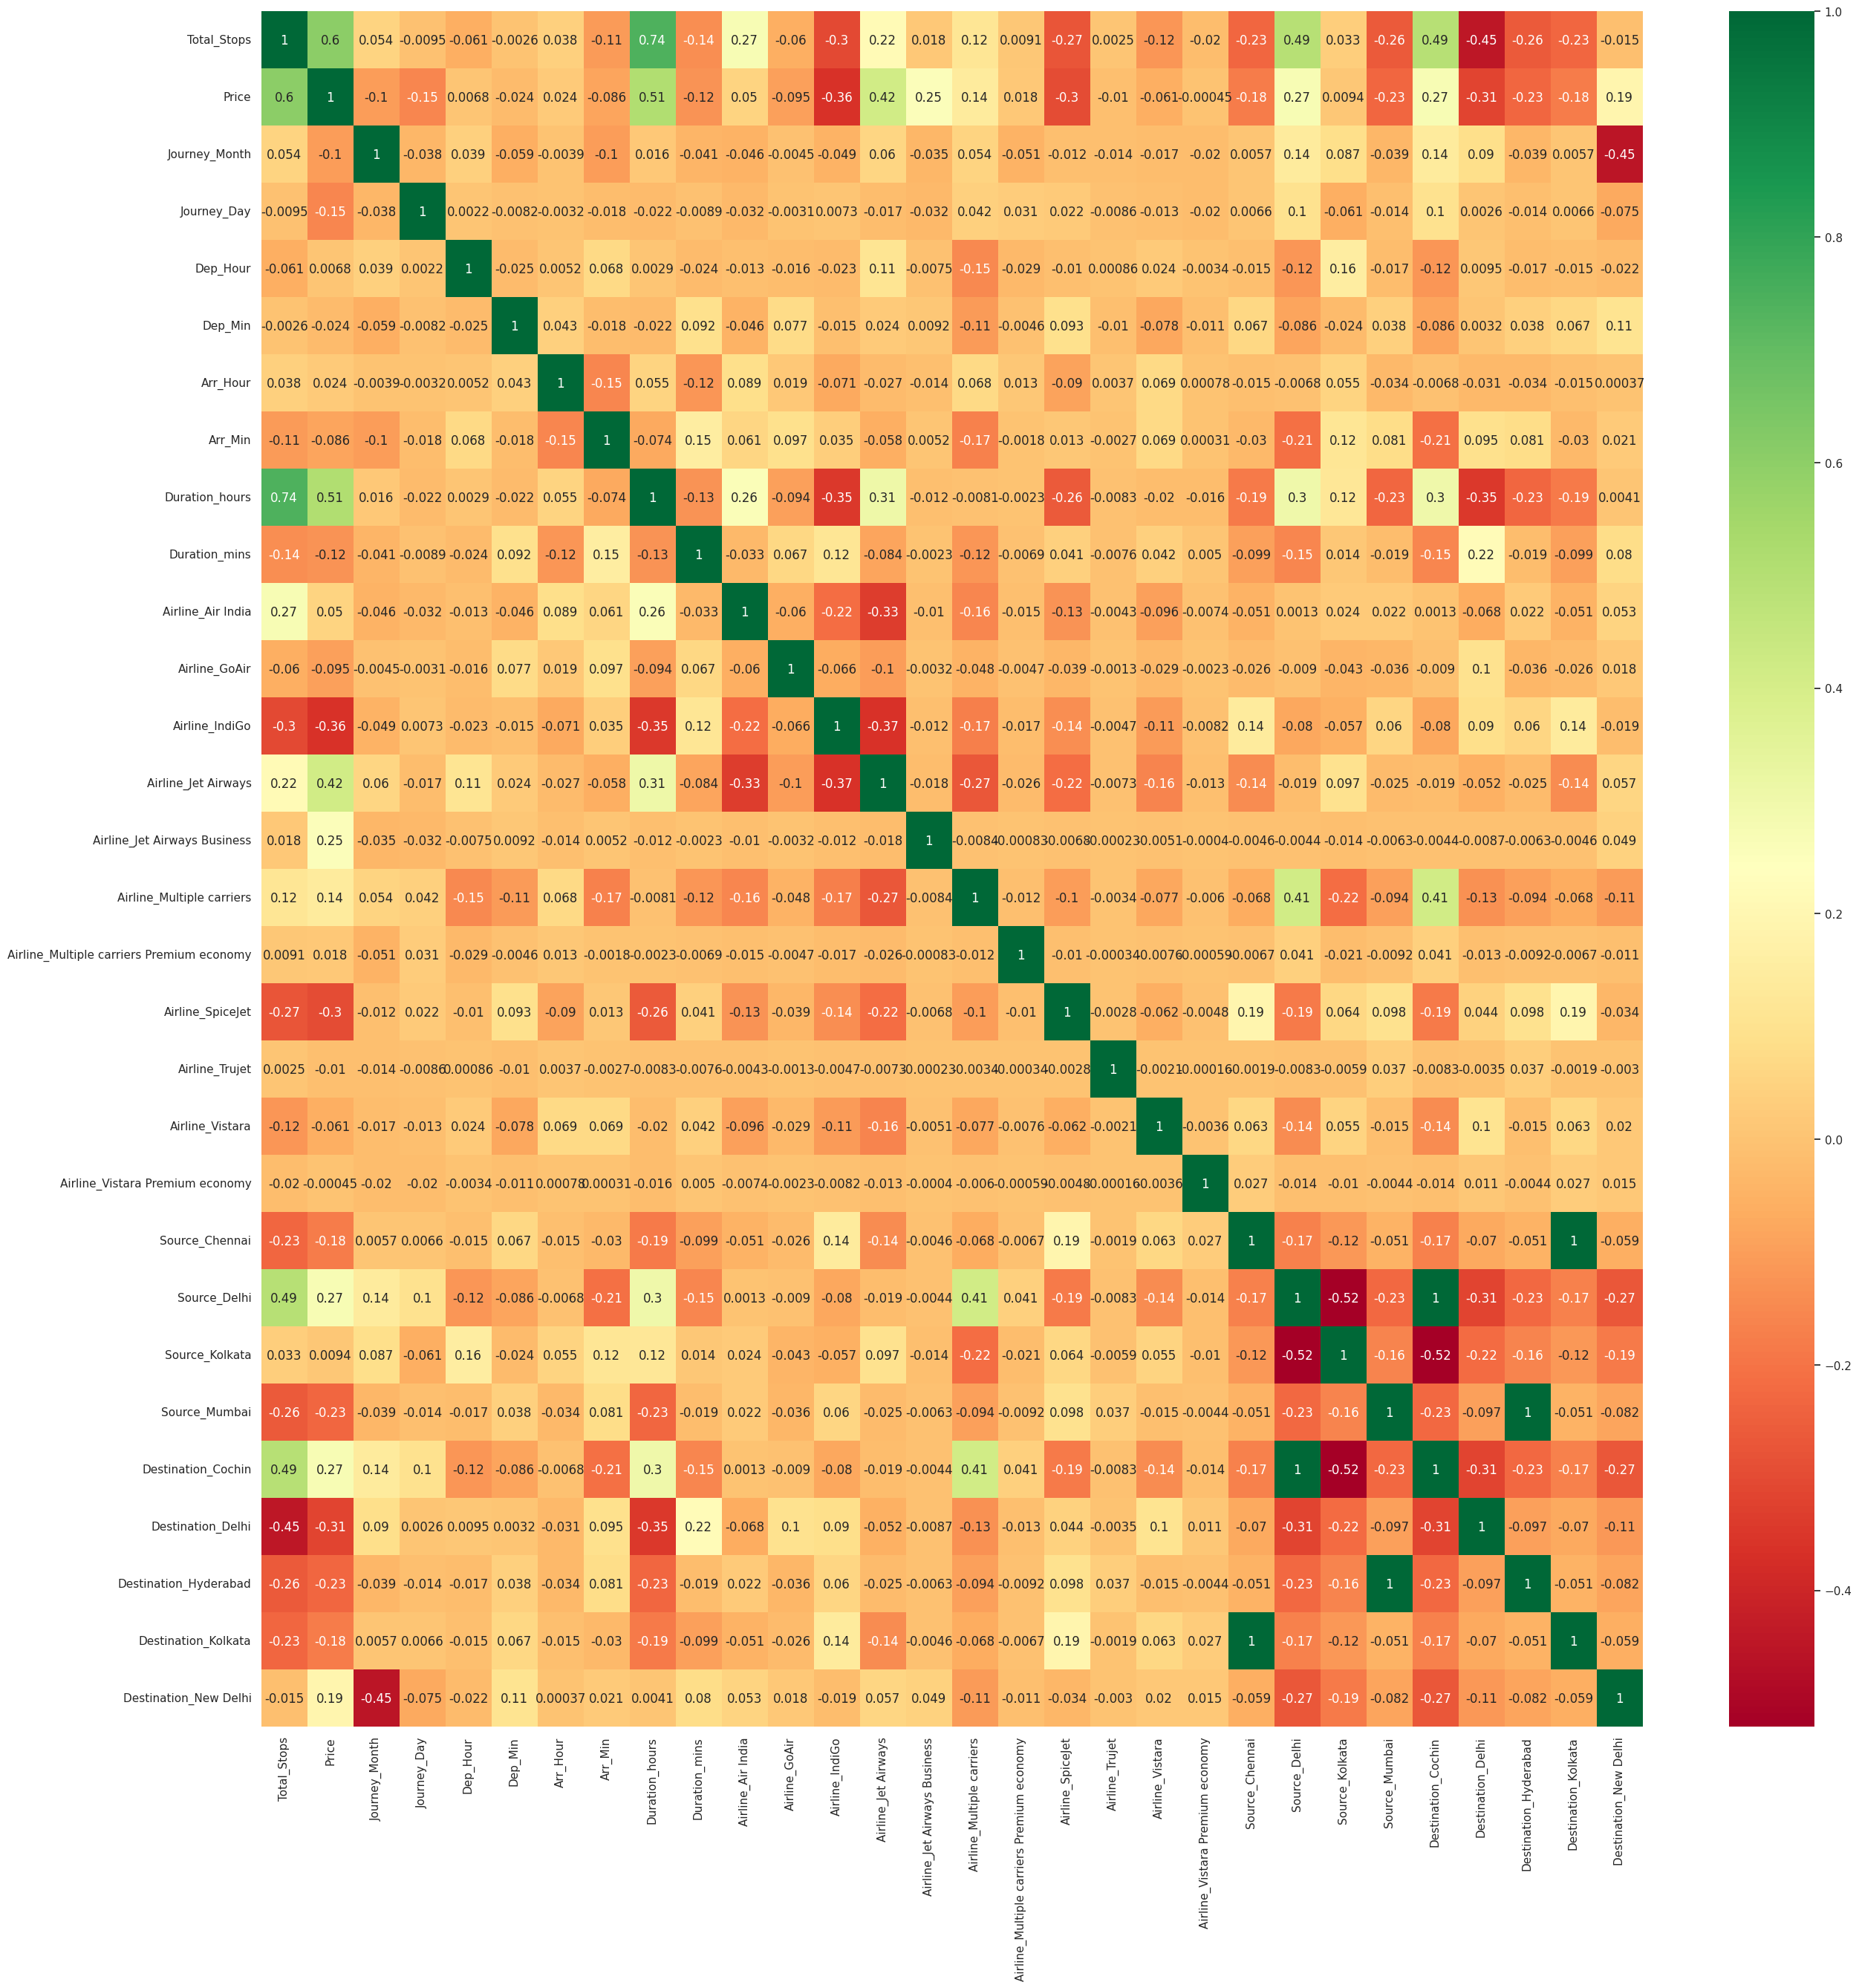

In [142]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [144]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [145]:
print(selection.feature_importances_)

[2.47959436e-01 5.28682408e-02 1.43931375e-01 2.39911375e-02
 2.11960789e-02 2.78677621e-02 1.88864959e-02 1.19553519e-01
 1.77443777e-02 8.69950685e-03 1.99669940e-03 1.59409111e-02
 1.33289895e-01 6.72030319e-02 1.96863357e-02 8.52943968e-04
 2.93965154e-03 1.18778536e-04 4.96049073e-03 7.46342787e-05
 3.85265719e-04 1.14759999e-02 3.18822129e-03 6.43581235e-03
 6.08682713e-03 1.05229665e-02 6.71922479e-03 5.23776977e-04
 2.49006033e-02]


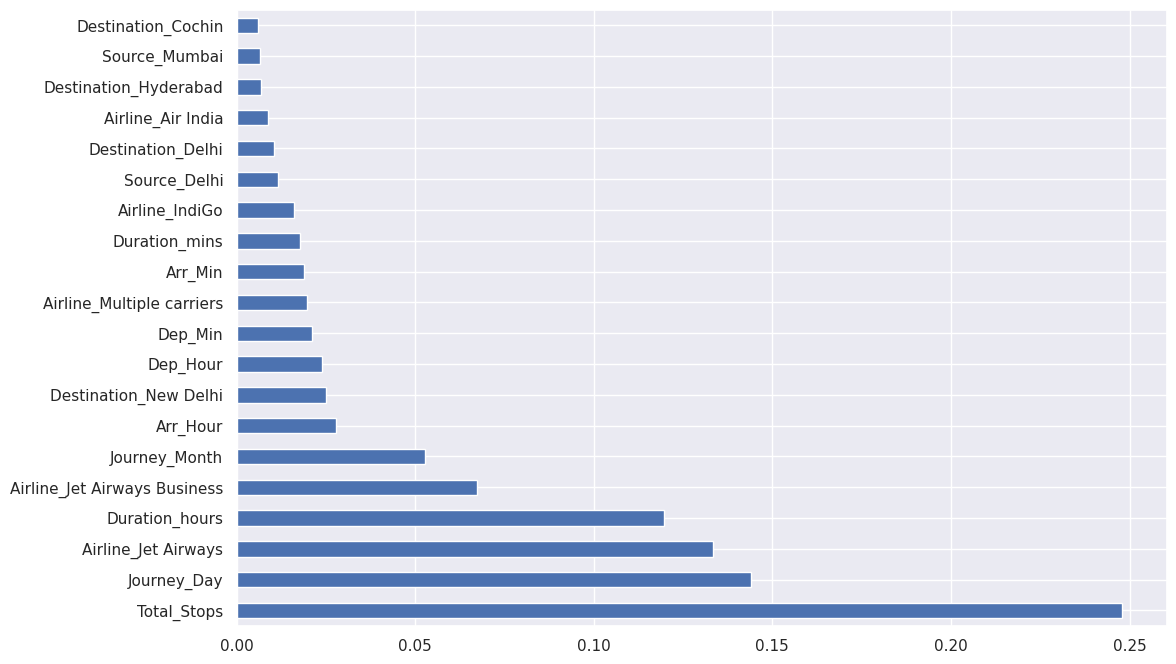

In [147]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [151]:
from sklearn.linear_model import LinearRegression
model_li = LinearRegression()
model_li.fit(X_train,y_train)

LinearRegression()

In [153]:
model_li.score(X_train,y_train)

0.6240840020468167

In [155]:
model_li.score(X_test,y_test)

0.61959437290701

In [156]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [157]:
model = [DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor,XGBRFRegressor]

for mod in model:
    reg = mod()
    reg = reg.fit(X_train,y_train)
    print(mod , 'accuracy',reg.score(X_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.7293702925185492
<class 'sklearn.svm._classes.SVR'> accuracy -0.00041646312498344606
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.7974880810583966
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.5742809538783227
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.5708280726329359
<class 'xgboost.sklearn.XGBRFRegressor'> accuracy 0.7196351398296943


In [158]:
from sklearn.model_selection import KFold,cross_val_score

In [159]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('XGB', XGBRFRegressor()))


results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.5648313600710685
CART 0.6937689190192653
RF 0.8031779936294561
SVM -0.00016124772787322604
AdaBoost 0.44826149420264316
XGB 0.7193219636095635


In [160]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [161]:
y_pred = reg_rf.predict(X_test)

In [162]:
reg_rf.score(X_train, y_train)

0.9535862928193434

In [163]:
reg_rf.score(X_test, y_test)

0.7981597172657949

In [166]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [168]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [169]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [171]:
rf_random = RandomizedSearchCV(estimator = reg_rf,
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [172]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [173]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

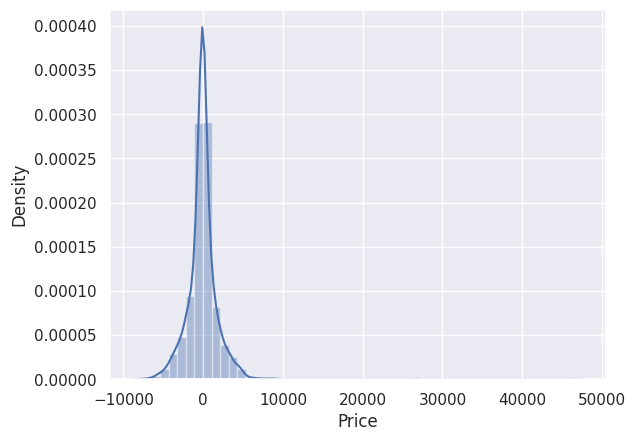

In [174]:
sns.distplot(y_test-y_pred)
plt.show()

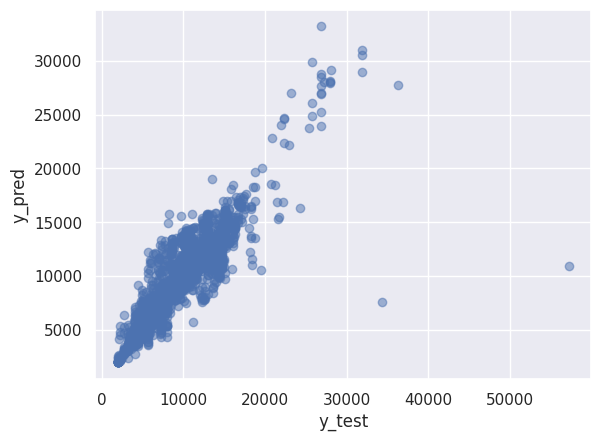

In [175]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [176]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [177]:
mean_absolute_error(y_test, y_pred)

1177.6501942116533

In [178]:
r2_score(y_test, y_pred)

0.7981597172657949